## Visualization of each step

### 1) Batch imge generation

In [1]:
from src.image_utils import generate_batch_images
from matplotlib import pyplot as plt

In [2]:
batch_size = 20
image_width = 512
image_height = 256
image_bands = 3
batch_count = 5
images_batches = [generate_batch_images(batch_size, image_width, image_height, image_bands) for i in range(batch_count)]

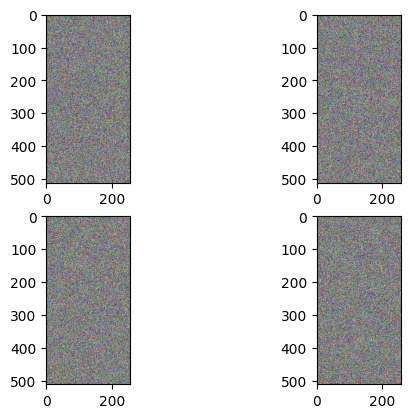

In [3]:
# subplots for 4 images in the first batch
batch_idx = 0
fig, ax = plt.subplots(2, 2)
ax[0, 0].imshow(images_batches[batch_idx][0])
ax[0, 1].imshow(images_batches[batch_idx][1])
ax[1, 0].imshow(images_batches[batch_idx][2])
ax[1, 1].imshow(images_batches[batch_idx][3])

### 2) Generate random squares corrds

In [4]:
from src.image_utils import generate_random_squares, burn_squares

In [5]:
sqaure_count = 2
square_size = 50
squares = generate_random_squares(image_width, image_height, square_size, sqaure_count)
print(squares)

[Square(x=181, y=422, size=50), Square(x=162, y=13, size=50)]


In [6]:
## Apply burn_squares
for c_batch in range(batch_count):
    for c_image in range(batch_size):
        img = images_batches[c_batch][c_image]
        squares = generate_random_squares(image_width, image_height, square_size, sqaure_count)
        burn_squares(img, squares)

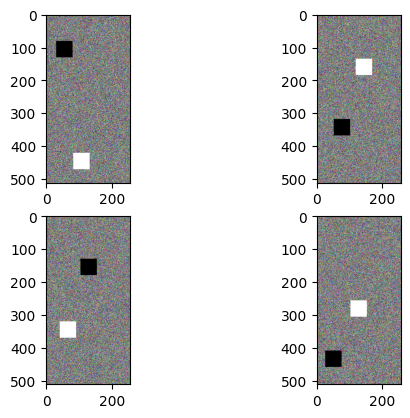

In [7]:
# subplots for 4 images in the first batch
batch_idx = 1
fig, ax = plt.subplots(2, 2)
ax[0, 0].imshow(images_batches[batch_idx][0])
ax[0, 1].imshow(images_batches[batch_idx][1])
ax[1, 0].imshow(images_batches[batch_idx][2])
ax[1, 1].imshow(images_batches[batch_idx][3])

### 3) Image cropping

In [8]:
from src.image_utils import random_batch_crop

In [9]:
crop_size = 200
cropped_batches = [random_batch_crop(batch, crop_size) for batch in images_batches]

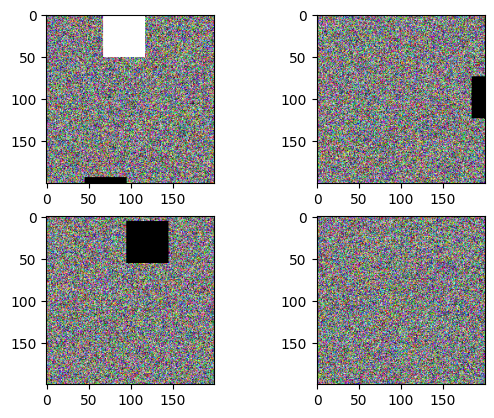

In [10]:
# subplots for 4 images in the first batch
batch_idx = 0
fig, ax = plt.subplots(2, 2)
ax[0, 0].imshow(cropped_batches[batch_idx][0])
ax[0, 1].imshow(cropped_batches[batch_idx][1])
ax[1, 0].imshow(cropped_batches[batch_idx][2])
ax[1, 1].imshow(cropped_batches[batch_idx][3])

### 4) Stats computation

In [11]:
from src.stats_utils import calculate_stats, stats_to_parquet

In [12]:
# stats for first batch
calculate_stats(cropped_batches[0])

{'white_avg': np.float64(965.0),
 'white_std': np.float64(1116.9265866653905),
 'white_min': np.int64(0),
 'white_max': np.int64(2500),
 'black_avg': np.float64(1116.5),
 'black_std': np.float64(1051.4384194996871),
 'black_min': np.int64(0),
 'black_max': np.int64(2500)}

In [13]:
stats_to_parquet(cropped_batches, 'test.parquet')

Stats saved to test.parquet


,batch_id,white_avg,white_min,white_max,white_std,black_avg,black_min,black_max,black_std
0,0,965.00,0,2500,1116.926587,1116.5,0,2500,1051.438419
1,1,1742.50,0,2500,1013.690658,752.5,0,2500,1106.850826
2,2,1113.55,0,2500,1125.985545,1357.1,0,2500,1180.574348
3,3,777.75,0,2500,1075.886234,1357.0,0,2500,1112.758285
4,4,900.30,0,2500,1058.683952,952.5,0,2500,1147.222189
